![alt text](steam.png)

# Matplotlib Avanzado


#### Escalas logaritmicas

ES posible setear los ejes a una escala logaritmica, usando `set_xscale` y `set_yscale` con el valor "log":

In [3]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 5, 11)

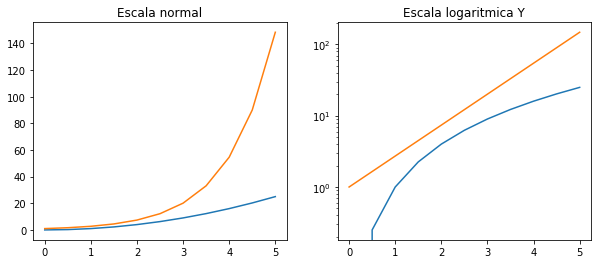

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Escala normal")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Escala logaritmica Y");

### Colocación etiquetas en las coordenadas (ticks)

Podemos determinar explicitamente los ticks labes mediante `set_xticks` y `set_yticks` aunque tambien podemos usar `set_xticklabels` y `set_yticklabels` con una lista para proveer información.

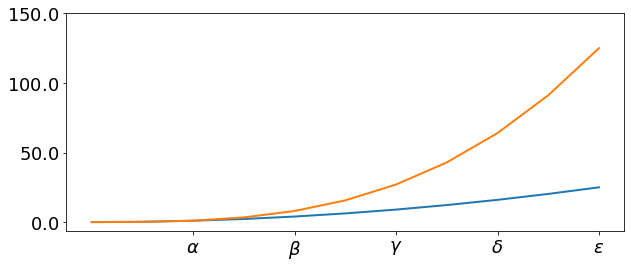

In [5]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # usa formato LaTex

Hay multiples y mas avanzados metodos para controlar la colocacipon de nombre de coordenadas. Mira para detalles http://matplotlib.org/api/ticker_api.html

#### Notación cientifica

Con un valores grandes en los ejes es mejor utilizar notación cientifica:

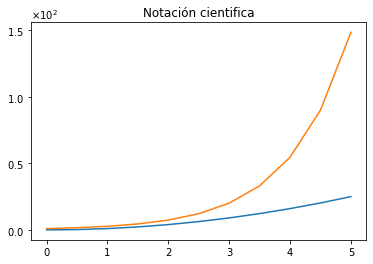

In [6]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("Notación cientifica")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 

### Grilla del eje

Podemos utilizar `grid` para el objeto del eje, de esta manera activamos y desactivamos

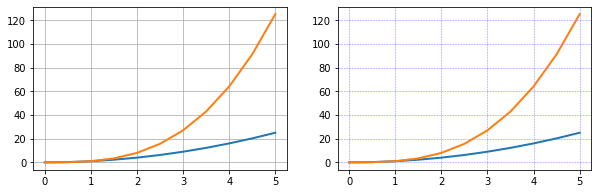

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# Apariencia del grid por default
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# customizando la apariencia
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

### Ejes Gemelos

Muchas veces es necesario usar ejes duales en X o Y, para esto debemos usar las funciones `twinx` y `twiny`:

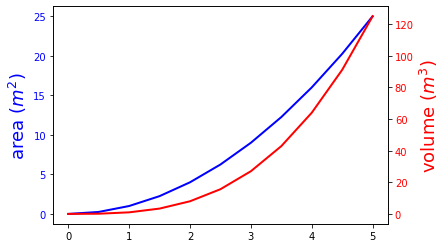

In [8]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### Ejes donde X y Y  son cero

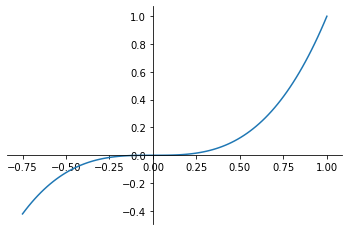

In [13]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

### Otros estilos 2D

In [16]:
n = np.array([0,1,2,3,4,5])

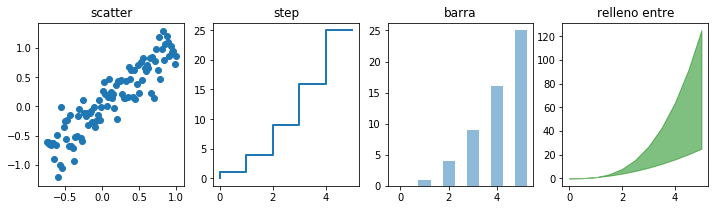

In [15]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("barra")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("relleno entre");

### Notaciones de texto

Las anotaciones soportan formato LaTeX  y se usa con la funcion `text`

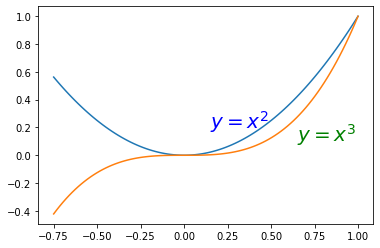

In [17]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

####  agregando ejes

Manualmente agregamos ejes con `add_axes` es util para insertar a figuras:

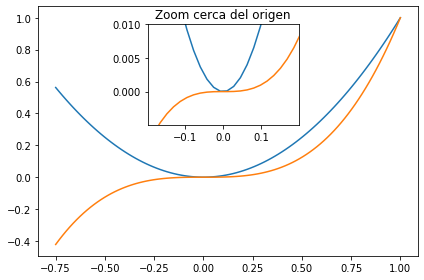

In [20]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout() # ajusta especificamente los parametros subplot

inset_ax = fig.add_axes([0.35, 0.55, 0.35, 0.35]) # X, Y, ancho, alto

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('Zoom cerca del origen')

# set rango del eje
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set labels del eje
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

### Mapas de calor y contorno de figuras

Son muy utiles para plotear funciones con 2 variables. Para una lista de colormaps predefinidos ver: http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [21]:
import matplotlib

In [22]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flujo(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [24]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flujo(X, Y)
print(phi_m,phi_p,Z)

[ 0.          0.06346652  0.12693304  0.19039955  0.25386607  0.31733259
  0.38079911  0.44426563  0.50773215  0.57119866  0.63466518  0.6981317
  0.76159822  0.82506474  0.88853126  0.95199777  1.01546429  1.07893081
  1.14239733  1.20586385  1.26933037  1.33279688  1.3962634   1.45972992
  1.52319644  1.58666296  1.65012947  1.71359599  1.77706251  1.84052903
  1.90399555  1.96746207  2.03092858  2.0943951   2.15786162  2.22132814
  2.28479466  2.34826118  2.41172769  2.47519421  2.53866073  2.60212725
  2.66559377  2.72906028  2.7925268   2.85599332  2.91945984  2.98292636
  3.04639288  3.10985939  3.17332591  3.23679243  3.30025895  3.36372547
  3.42719199  3.4906585   3.55412502  3.61759154  3.68105806  3.74452458
  3.8079911   3.87145761  3.93492413  3.99839065  4.06185717  4.12532369
  4.1887902   4.25225672  4.31572324  4.37918976  4.44265628  4.5061228
  4.56958931  4.63305583  4.69652235  4.75998887  4.82345539  4.88692191
  4.95038842  5.01385494  5.07732146  5.14078798  5.2

#### pcolor

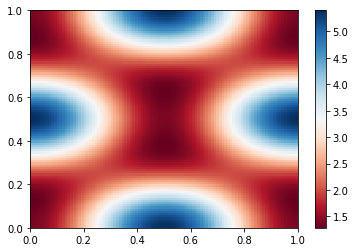

In [26]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu)
cb = fig.colorbar(p, ax=ax)

#### contour

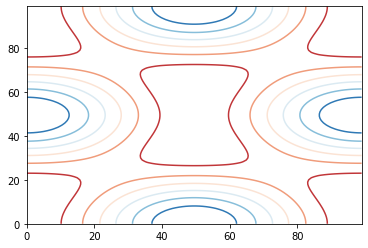

In [27]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu)
# cmap mapa de color

## Figuras en 3D

Para usar figuras en 3D debemos crear una instancia de `Axes3D` los ejes se agregan a matplotlib igual que 2D; o de manera conveniente pasando el argumento `projection='3d'` a `add_axes` o `add_subplot` methods.

In [28]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

#### Graficas de superficie

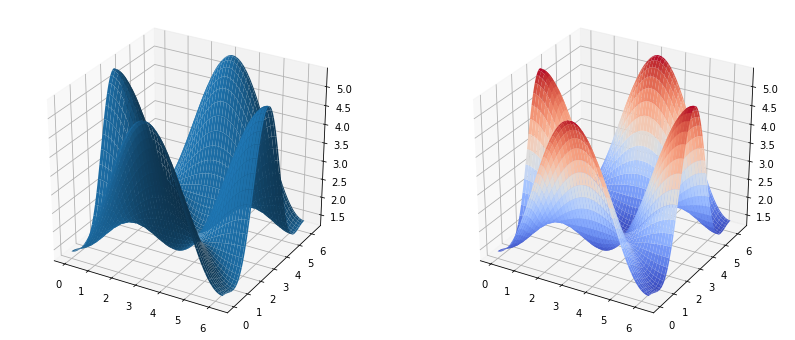

In [29]:
fig = plt.figure(figsize=(14,6))

# ax es un instancia 3D por projection=3d
ax = fig.add_subplot(1, 2, 1, projection='3d')

#Grafica la superficie en 3D
p = ax.plot_surface(X, Y, Z)

# grafica de superficie con gradiente de color
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, cmap=matplotlib.cm.coolwarm)

#### Esqueleto 3D

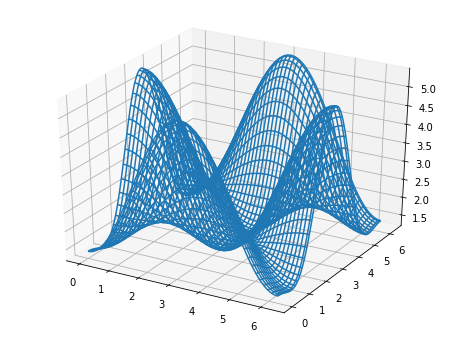

In [30]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z)

#### Contornos con proyecciones

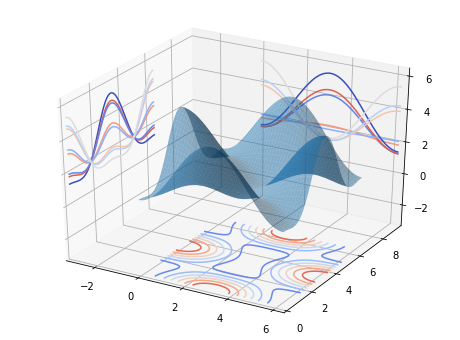

In [36]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, alpha=0.5)

#abajo
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm) 
#izquierda
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
#derecha
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

# seteamos los limites de las proyecciones
ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

## Lecturas que recomendamos

* http://www.matplotlib.org - Proyecto Matplotlib
* https://github.com/matplotlib/matplotlib - Codigo fuente matplotlib
* http://matplotlib.org/gallery.html - Galeria de casos de gráficos que se pueden crear
* http://www.loria.fr/~rougier/teaching/matplotlib - Tutorial Extra
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Referencias de matplotlib
